In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv("C:/Users/surendar.reddy/Documents/data Science projet_Data traine/DataTrained_Project_Week-1/abalone.csv")
pd.set_option('display.max_rows', None)

In [7]:
print('Shape-',df.shape)
df.describe()
#There are outliers seen far from min and max

Shape- (4177, 9)


Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

In [8]:
df.info()
#Only Sex need Encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [9]:
df['Sex']=df['Sex'].replace({'I':0, 'F':1, 'M':2})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [10]:
x=df.drop(columns=['Rings'],axis=1)
y=df['Rings']
y.value_counts()
#The dataFrame do not look very balanced
#Need to address Unbalance in the dataset

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [11]:
print(df.isnull().sum())
#No Null values

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


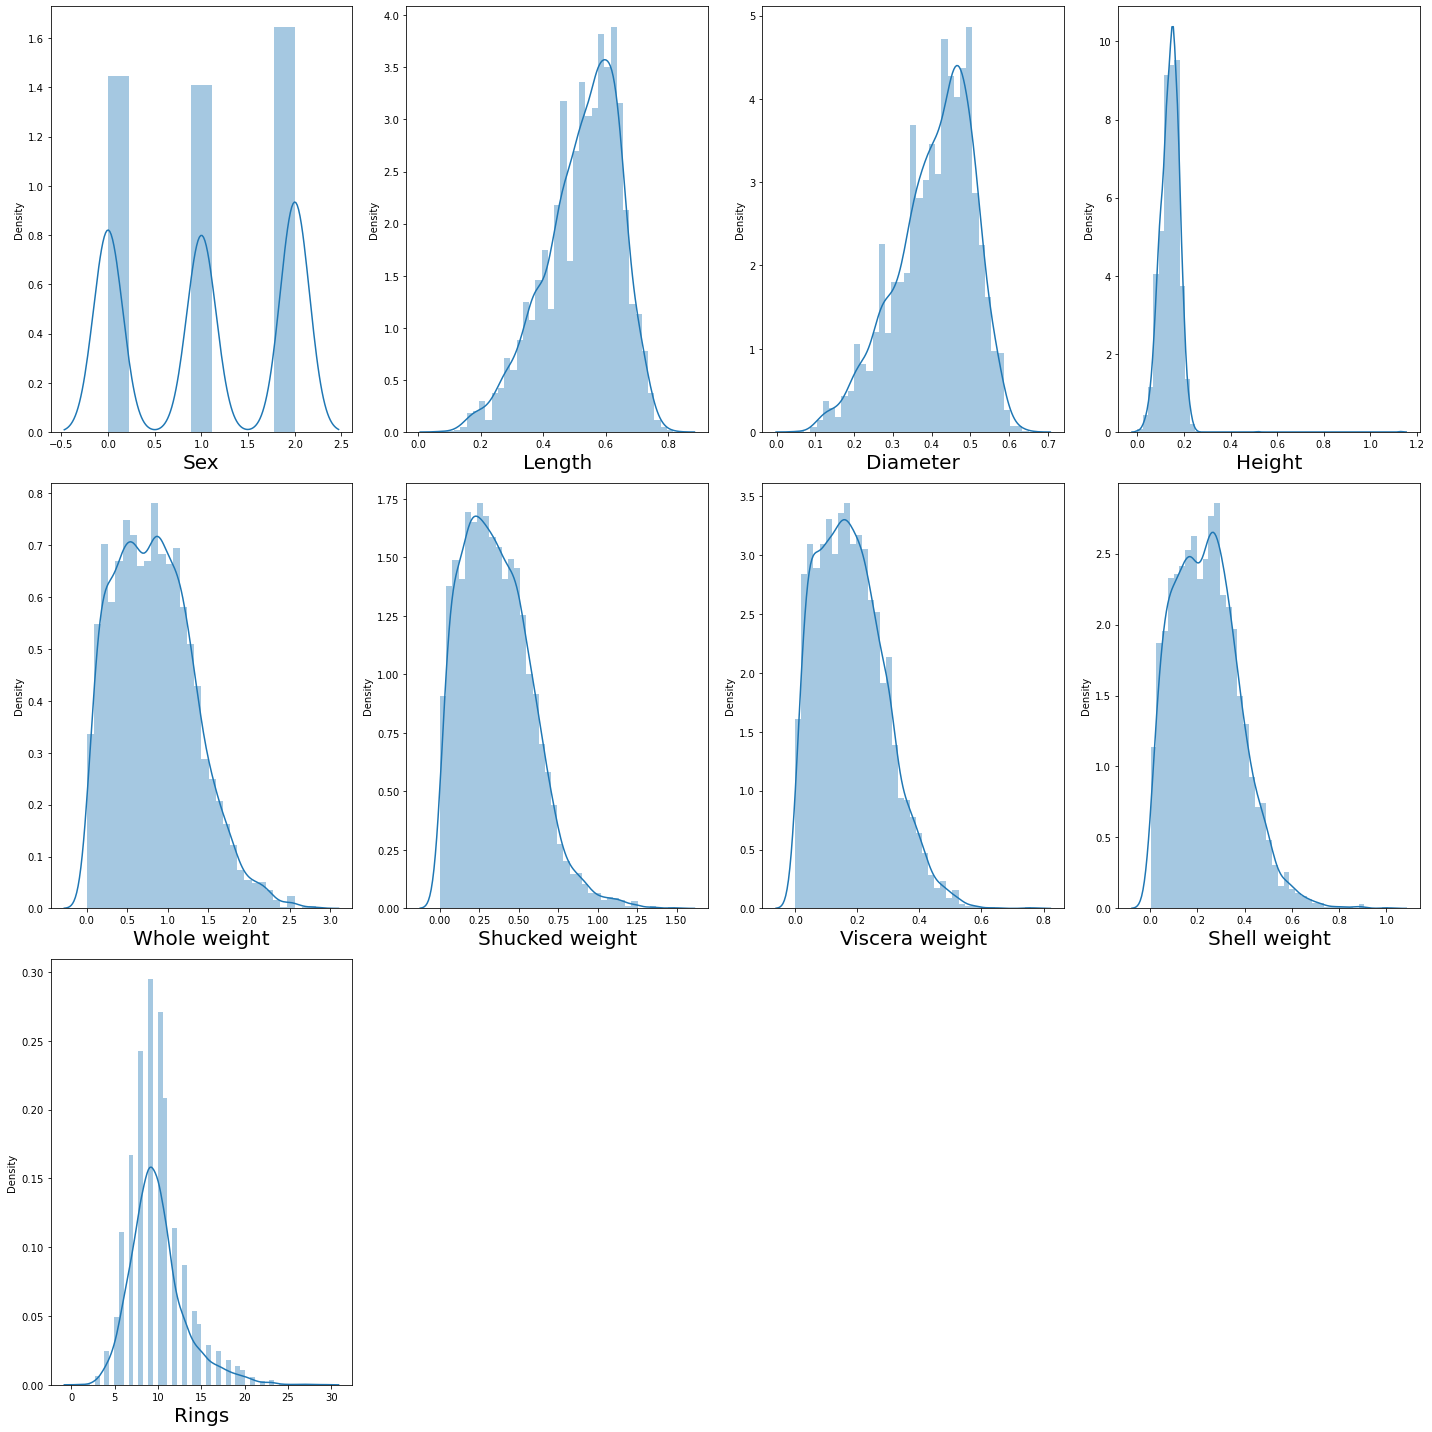

In [12]:
#Check How the data is distributed
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()  

#The data looks quike Normal,except height,lenght, and Diameter Check with Skews values to cross check

In [13]:
df.skew().sort_values(ascending=False)
#The screw value show all above 0.5 so need trasformation

Height            3.128817
Rings             1.114102
Shucked weight    0.719098
Shell weight      0.620927
Viscera weight    0.591852
Whole weight      0.530959
Sex              -0.083056
Diameter         -0.609198
Length           -0.639873
dtype: float64

In [14]:
#Correction of Screwness, Use Z Score
from scipy.stats import zscore
z_score=zscore(df[['Height','Shucked weight','Shell weight','Viscera weight','Whole weight','Diameter','Length']])
abs_zscore=np.abs(z_score)
filtering_entry=(abs_zscore<3).all(axis=1)
df=df[filtering_entry]
df.describe()
df.skew().sort_values(ascending=False)

Rings             1.136367
Shucked weight    0.449573
Viscera weight    0.429932
Shell weight      0.358512
Whole weight      0.323886
Sex              -0.071702
Height           -0.247192
Diameter         -0.605450
Length           -0.633786
dtype: float64

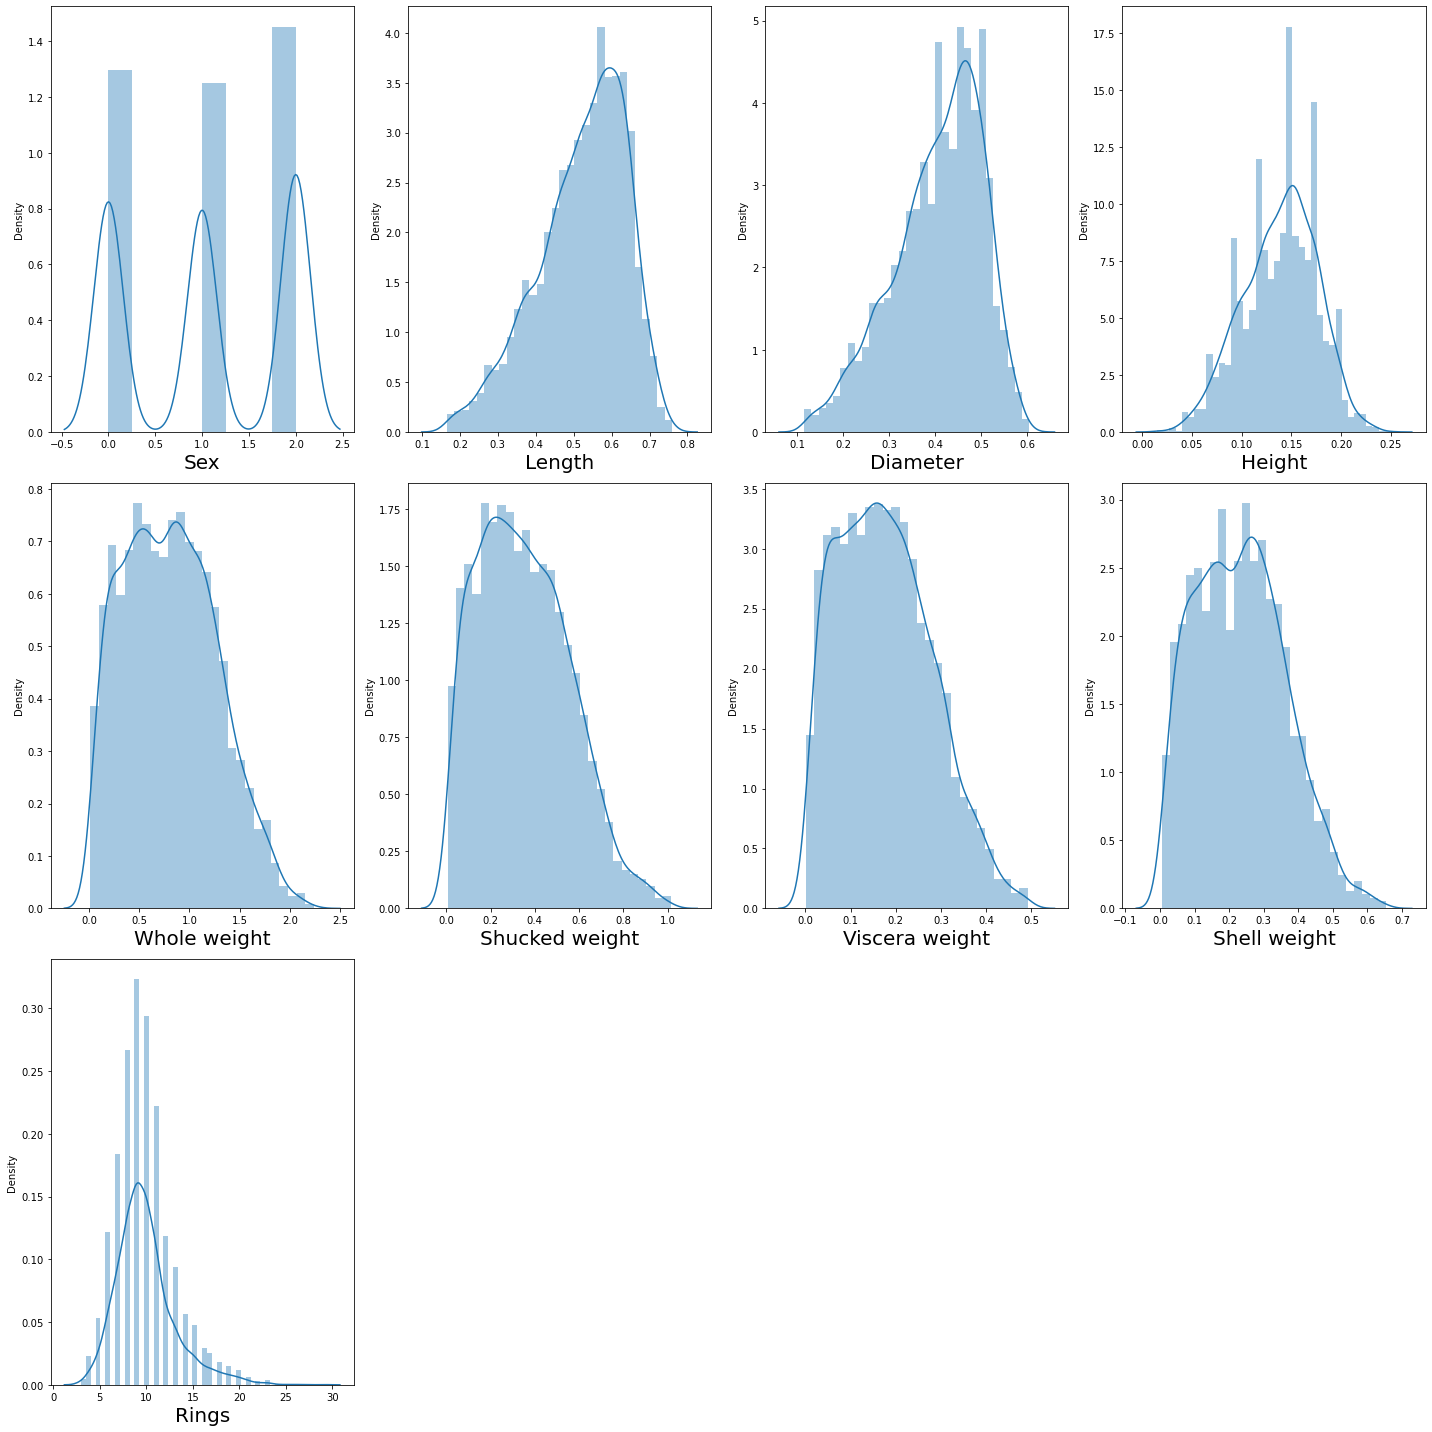

In [15]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()  


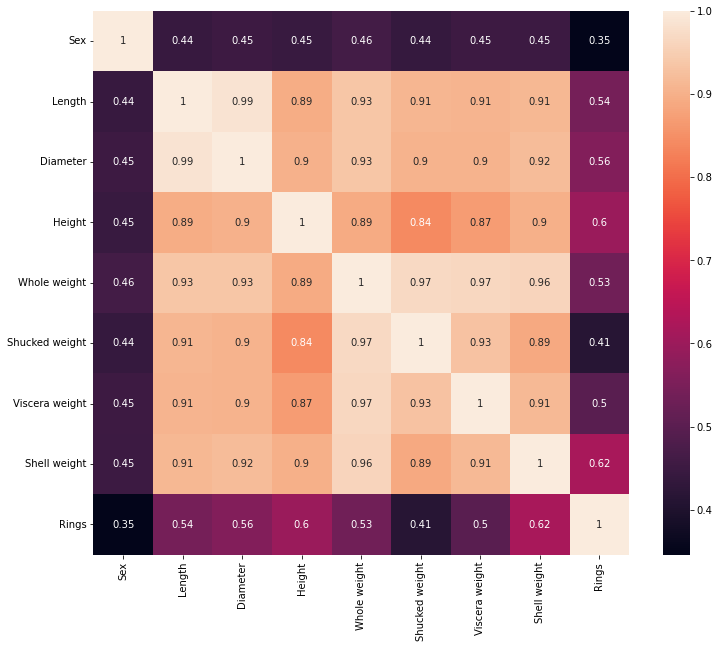

In [16]:
corr=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)
plt.show()
#Looks the features are really corelated

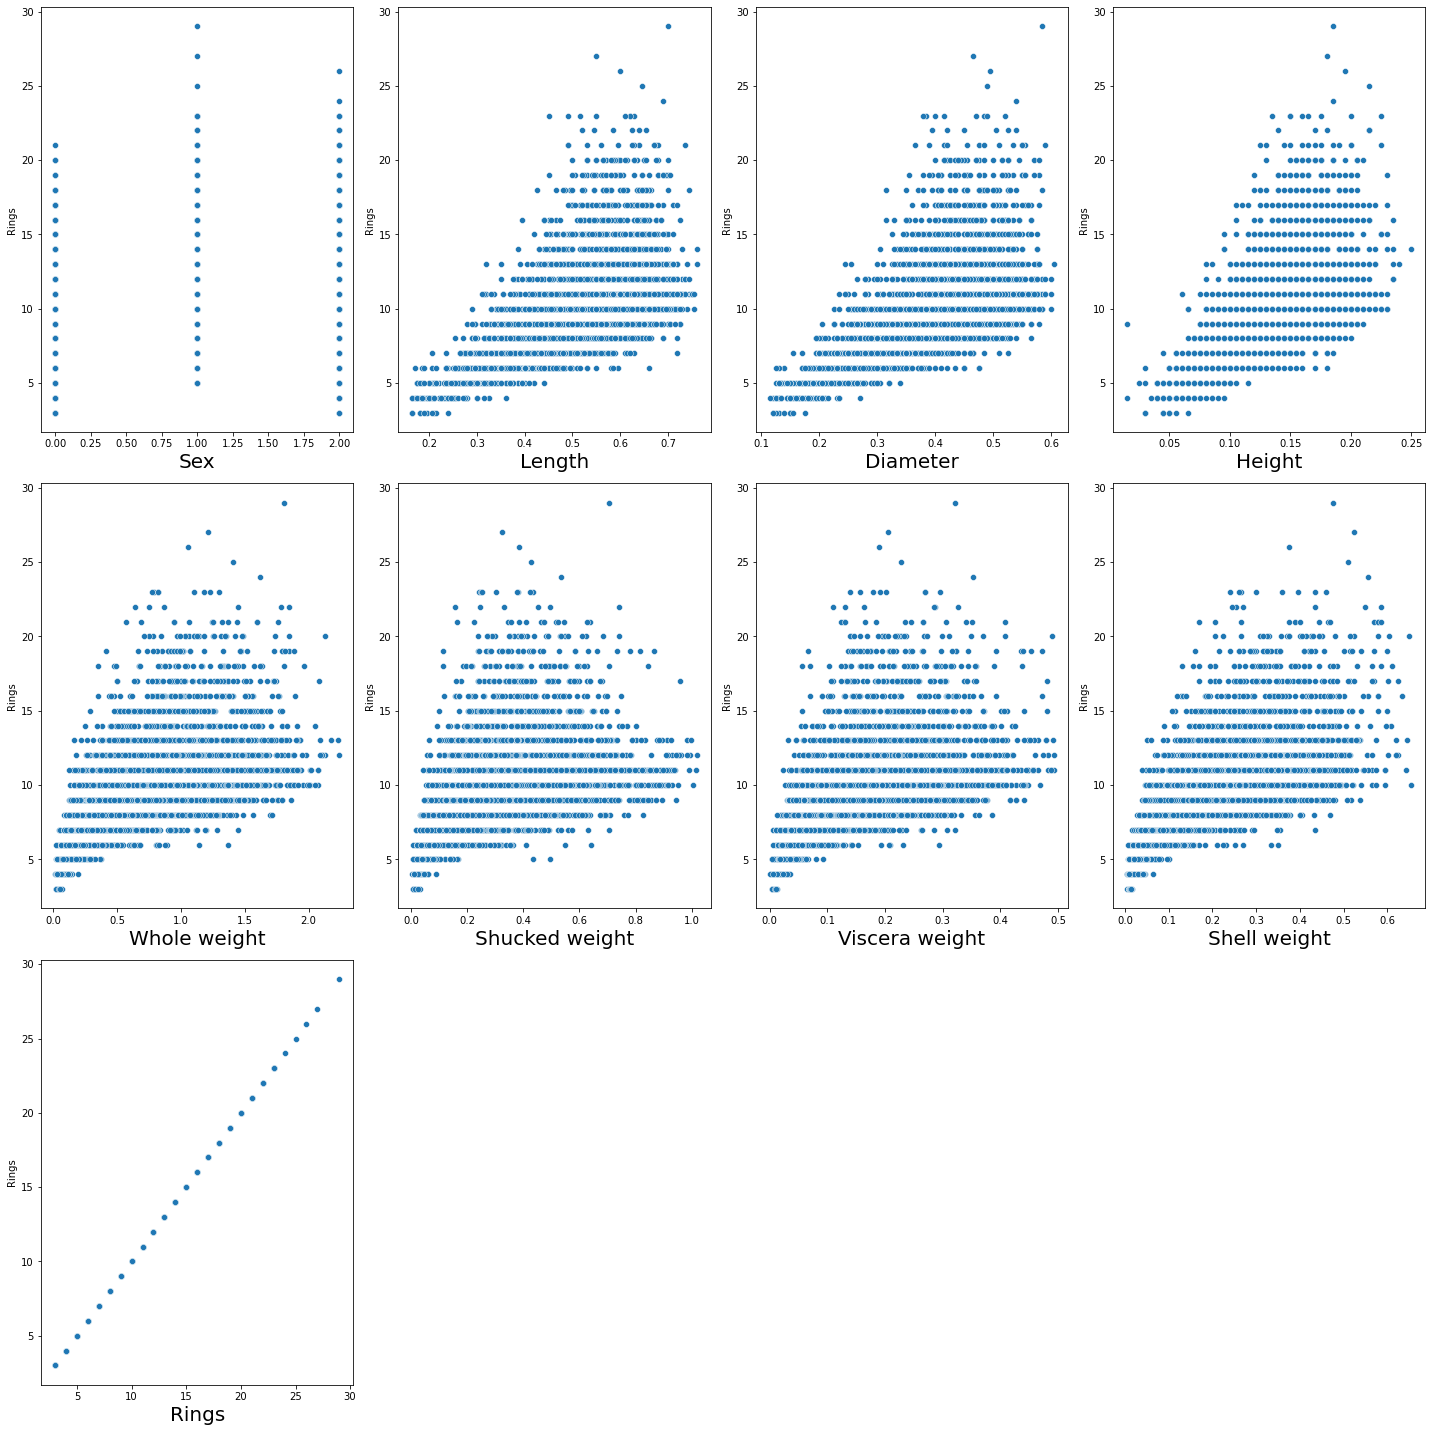

In [17]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.scatterplot(x=df[column],y=df['Rings'])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


In [18]:
#Multicollinearity check
x=df.drop(columns=['Rings'],axis=1)
y=df['Rings']

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns


vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
print(vif_data)


          feature         VIF
0             Sex    3.307387
1          Length  707.907435
2        Diameter  765.542548
3          Height   92.082323
4    Whole weight  431.390410
5  Shucked weight  104.804418
6  Viscera weight   64.425130
7    Shell weight   92.778645


In [19]:
#As there is lot of Multicollinearily I will use Top 3 features 
from sklearn.feature_selection import SelectKBest, f_classif
best_features=SelectKBest(score_func=f_classif, k=3)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
feaures_scores=pd.concat([df_scores,df_columns], axis=1)
feaures_scores.columns=['Score','feature Name']
feaures_scores

#So hightes values implies high contribution so I will go with Shell Weight, Diameter,Lenght

Score    feature Name
0   42.014710             Sex
1  186.827479          Length
2  195.253315        Diameter
3  173.563768          Height
4  122.994202    Whole weight
5   88.515324  Shucked weight
6  111.060846  Viscera weight
7  158.816862    Shell weight

In [20]:
x=x.drop(columns=['Sex','Whole weight','Shucked weight','Viscera weight','Height','Length'],axis=1)

In [21]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
print(vif_data)

#The VIF Scores looks not very good but okay..
#After VIF Score I will also remove Length

#This looks go to proceed

        feature        VIF
0      Diameter  10.964457
1  Shell weight  10.964457


In [22]:
#!pip install imblearn
#Balance the Data set
from imblearn.over_sampling import SMOTE
stategy = {11:510,7:510,6:510,12:510,13:510,14:510,5:510,15:510,16:510,17:510,4:510,18:510,19:510,20:510,21:510,3:510,23:510,22:510}
#510 HERE IMPLIES 75% OF MAJORITY CLASS
oversample=SMOTE(sampling_strategy=stategy,k_neighbors=5)
x_smoted, y_smoted=oversample.fit_resample(x,y)

# summarize distribution
counter = y_smoted.value_counts()
for k,v in counter.items():
    per = v / len(y_smoted) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
#THE dataSET IS BALANCED NOW, 

Class=9, n=686 (6.201%)
Class=10, n=625 (5.650%)
Class=8, n=566 (5.117%)
Class=15, n=510 (4.610%)
Class=7, n=510 (4.610%)
Class=23, n=510 (4.610%)
Class=3, n=510 (4.610%)
Class=22, n=510 (4.610%)
Class=17, n=510 (4.610%)
Class=21, n=510 (4.610%)
Class=6, n=510 (4.610%)
Class=4, n=510 (4.610%)
Class=5, n=510 (4.610%)
Class=13, n=510 (4.610%)
Class=18, n=510 (4.610%)
Class=12, n=510 (4.610%)
Class=11, n=510 (4.610%)
Class=14, n=510 (4.610%)
Class=19, n=510 (4.610%)
Class=16, n=510 (4.610%)
Class=20, n=510 (4.610%)
Class=26, n=1 (0.009%)
Class=29, n=1 (0.009%)
Class=25, n=1 (0.009%)
Class=27, n=1 (0.009%)
Class=24, n=1 (0.009%)


In [23]:
x=pd.DataFrame(x_smoted,columns=x.columns)
x

Diameter  Shell weight
0      0.365000      0.150000
1      0.265000      0.070000
2      0.420000      0.210000
3      0.365000      0.155000
4      0.255000      0.055000
5      0.300000      0.120000
6      0.415000      0.330000
7      0.425000      0.260000
8      0.370000      0.165000
9      0.440000      0.320000
10     0.380000      0.210000
11     0.350000      0.135000
12     0.380000      0.190000
13     0.405000      0.205000
14     0.355000      0.185000
15     0.400000      0.240000
16     0.280000      0.115000
17     0.340000      0.130000
18     0.295000      0.100000
19     0.320000      0.115000
20     0.280000      0.075000
21     0.275000      0.085000
22     0.440000      0.270000
23     0.415000      0.200000
24     0.480000      0.305000
25     0.440000      0.300000
26     0.450000      0.285000
27     0.445000      0.280000
28     0.475000      0.295000
29     0.425000      0.200000
30     0.470000      0.330000
31     0.560000      0.460000
32     0.525000      0.350000
33     0.550000      0.455000
34     0.550000      0.490000
35     0.355000      0.125000
36     0.475000      0.340000
37     0.355000      0.145000
38     0.445000      0.260000
39     0.290000      0.090000
40     0.335000      0.115000
41     0.425000      0.270000
42     0.175000      0.020000
43     0.150000      0.012000
44     0.150000      0.015000
45     0.295000      0.075000
46     0.370000      0.140000
47     0.375000      0.150000
48     0.245000      0.045000
49     0.425000      0.245000
50     0.410000      0.190000
51     0.320000      0.100000
52     0.360000      0.160000
53     0.360000      0.150000
54     0.310000      0.110000
55     0.400000      0.220000
56     0.350000      0.135000
57     0.385000      0.170000
58     0.190000      0.025000
59     0.400000      0.175000
60     0.345000      0.135000
61     0.405000      0.175000
62     0.410000      0.200000
63     0.325000      0.100000
64     0.400000      0.185000
65     0.355000      0.135000
66     0.440000      0.320000
67     0.495000      0.485000
68     0.390000      0.170000
69     0.235000      0.045000
70     0.425000      0.275000
71     0.320000      0.100000
72     0.475000      0.425000
73     0.480000      0.380000
74     0.450000      0.315000
75     0.475000      0.280000
76     0.475000      0.315000
77     0.470000      0.305000
78     0.425000      0.285000
79     0.475000      0.345000
80     0.445000      0.285000
81     0.425000      0.320000
82     0.475000      0.580000
83     0.450000      0.360000
84     0.465000      0.440000
85     0.465000      0.400000
86     0.440000      0.260000
87     0.355000      0.165000
88     0.450000      0.330000
89     0.425000      0.255000
90     0.440000      0.260000
91     0.465000      0.390000
92     0.495000      0.390000
93     0.560000      0.485000
94     0.535000      0.480000
95     0.435000      0.250000
96     0.375000      0.145000
97     0.370000      0.165000
98     0.375000      0.155000
99     0.265000      0.075000
100    0.435000      0.255000
101    0.435000      0.335000
102    0.415000      0.205000
103    0.470000      0.345000
104    0.410000      0.235000
105    0.430000      0.280000
106    0.400000      0.220000
107    0.390000      0.200000
108    0.395000      0.130000
109    0.395000      0.155000
110    0.360000      0.175000
111    0.320000      0.105000
112    0.350000      0.165000
113    0.410000      0.210000
114    0.415000      0.180000
115    0.375000      0.220000
116    0.340000      0.165000
117    0.430000      0.310000
118    0.305000      0.085000
119    0.365000      0.140000
120    0.295000      0.085000
121    0.425000      0.255000
122    0.265000      0.070000
123    0.280000      0.070000
124    0.195000      0.030000
125    0.275000      0.070000
126    0.290000      0.080000
127    0.535000      0.540000
128    0.480000      0.410000
129    0.350000      0.129000
130    0.260000      0.062000
131    0.260000      0.068000
132    0.200000  

In [24]:
y=pd.DataFrame(y_smoted,columns=['Rings'])
y

#Will not be able to oversample these Label class with 1 rows so will make sure there are set in training the model

Rings
0         15
1          7
2          9
3         10
4          7
5          8
6         20
7         16
8          9
9         19
10        14
11        10
12        11
13        10
14        10
15        12
16         7
17        10
18         7
19         9
20        11
21        10
22        12
23         9
24        10
25        11
26        11
27        12
28        15
29        11
30        10
31        15
32        18
33        19
34        13
35         8
36        16
37         8
38        11
39         9
40         9
41        14
42         5
43         5
44         4
45         7
46         9
47         7
48         6
49         9
50         8
51         7
52        10
53        10
54         7
55         8
56         8
57         8
58         4
59         7
60         7
61         9
62        10
63         7
64         8
65         8
66        12
67        13
68        10
69         6
70        13
71         8
72        20
73        11
74        13
75        15
76         9
77        10
78        11
79        14
80         9
81        16
82        21
83        14
84        12
85        13
86        10
87         9
88        12
89        15
90        12
91        13
92        10
93        15
94        14
95         9
96         8
97         7
98        10
99         7
100       15
101       15
102       10
103       12
104       12
105       11
106       10
107        9
108        9
109        9
110        9
111        9
112        9
113       11
114       11
115       11
116       10
117        9
118        8
119        9
120        7
121       14
122        6
123        6
124        5
125        6
126        8
127       19
128       17
129        9
130        7
131        7
132        7
133        8
134        7
135        9
136        9
137        9
138       10
139       10
140       16
141       11
142       10
143       10
144       10
145        9
146        5
147        4
148       15
149        9
150       10
151       10
152       12
153       10
154       13
155       16
156       13
157       13
158       13
159       13
160       12
161       20
162       12
163        7
164        8
165        8
166        5
167        7
168        5
169        8
170        4
171       11
172       14
173       21
174       10
175       10
176       12
177       13
178       12
179       10
180       11
181        9
182       13
183       12
184       14
185        8
186       10
187       12
188       11
189       16
190       15
191       10
192        9
193       13
194       12
195       13
196        8
197        9
198        9
199        8
200       13
201        7
202       10
203        7
204       12
205        9
206       14
207       10
208        8
209        7
210       10
211        8
212        9
213       11
214        9
215       11
216       10
217        9
218        7
219        7
220       11
221       15
222       13
223       14
224       22
225        7
226       12
227        9
228       17
229        5
230        5
231        8
232        8
233       10
234       13
235        9
236        7
237        7
238        7
239       13
240       12
241       15
242       15
243       15
244       19
245       10
246       15
247       13
248       11
249       12
250       11
251        4
252        6
253       11
254       14
255        8
256        9
257       13
258       22
259       16
260       14
261       15
262       13
263       22
264       12
265       20
266       11
267       15
268        7
269        9
270       14
271       14
272       10
273       10
274       17
275        9
276       10
277       17
278       12
279       15
280       19
281       26
282        6
283        6
284        4
285       11
286        9
287        9
288       13
289        8
290        6
291       10
292        4
293        3
294       13
295       14
296       10
297       21
298       14
299       19
300       23
301       23
302        8
303       14
304       10
305       18
306        6
307

In [25]:
#Scale the fetures
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.30945172, -0.70510249],
       [-1.15397493, -1.21250025],
       [ 0.15503605, -0.32455417],
       ...,
       [ 0.86057049,  1.0426559 ],
       [ 0.6242046 ,  0.97039821],
       [ 0.62335751,  1.16015455]])

In [32]:
#Train the data to the model

x_train, x_test, y_train, y_test=train_test_split(x_scaled,y,test_size=0.25, random_state=100)

In [33]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
clf_accuracy=metrics.r2_score(y_test,y_pred)
clf_accuracy

0.6213175563886555

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
knn_accuracy=metrics.r2_score(y_test,y_pred)
knn_accuracy

0.5385740699135485

In [35]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
RF_accuracy=metrics.r2_score(y_test,y_pred)
RF_accuracy

0.6616323389986363

In [36]:
from sklearn.ensemble import BaggingClassifier
bclf=BaggingClassifier()
bclf.fit(x_train,y_train)
y_pred=bclf.predict(x_test)
bclf_accuracy=metrics.r2_score(y_test,y_pred)
bclf_accuracy

0.6312760290313794

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt_clf=GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
y_pred=gbdt_clf.predict(x_test)
gbdt_clf_accuracy=metrics.r2_score(y_test,y_pred)
gbdt_clf_accuracy

0.6013505181824698

In [38]:
#Will Go and Hypertune Random Forest for this classification 
#Before then Let see if the model is overfitting
# Crossvalidation score also show there is no overfitting isse
from sklearn.model_selection import cross_val_score
CS_RF=cross_val_score(RF,x_scaled,y,cv=5)
CS_RF.mean()


0.418554546576248

In [39]:
RF=RandomForestClassifier()
params={'criterion':['entropy','gini'],
        'max_depth':range(5,20,2),
         'min_samples_split':range(2,6,2),
         'min_samples_leaf':range(2,6,2)
       }
grd=GridSearchCV(RF,param_grid=params,)
grd.fit(x_train,y_train)
RF=grd.best_estimator_
y_pred=RF.predict(x_test)
RF_accuracy=metrics.r2_score(y_test,y_pred)
RF_accuracy

0.6688657567532104

In [59]:
with open("RF", "wb") as f:
    pickle.dump(RF, f)